#DS17 Unit 4 Build Week - Official Spotify Notebook

#Imports

In [ ]:
!pip install spotipy

In [ ]:
%load_ext tensorboard
%tensorflow_version 2.X

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import spacy
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense,Conv2D,Conv1D, GlobalAveragePooling2D, MaxPooling2D,Flatten
from tensorflow.keras.models import Model, Sequential
# from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

import re
import string
import requests
from bs4 import BeautifulSoup
import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import requests

nlp = spacy.load("en_core_web_sm")

# Spotipy API Login
cid = 'b7bbbca585dc427badc487828339c228'
secret = '2ab78372f5d44d1ebb30df994100c245'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

from google.colab import drive
drive.mount('/content/drive')

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.X`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import Data

In [ ]:
# LOAD DATA
filepath='SpotifyFeatures.csv'
SpotifyFeatures_dataset = pd.read_csv(f'/content/drive/My Drive/{filepath}').drop_duplicates(subset=['track_id'])  # All Catergories including genres
df = SpotifyFeatures_dataset.copy()  # Duplicate orginial file for modifications
print("Shape:")
print(df.shape) 
print("\nColumn Headers:")
print(df.columns)
print("\nNaNs present?:")
print(df.isnull().sum())

# PREPROCESS
#Data Cleaning
numberValue = [0,1,2,3,4,5,6,7,8,9,10,11]
df['key'].unique()
df.replace(to_replace=['C#', 'F#', 'C', 'F', 'G', 'E', 'D#', 'G#', 'D', 'A#', 'A', 'B'], value=numberValue, inplace=True)
df.replace(to_replace=['Major','Minor'], value=[0,1], inplace=True)
df.replace(to_replace=['4/4', '5/4', '3/4', '1/4', '0/4'], value=[0,1,2,3,4], inplace=True)
df.dropna(inplace=True)
# df.drop_duplicates(subset=['track_id'], inplace=True)  # duplicates are actually dropped during read_csv process
#Dropping Data
# df.drop(['artist_name','track_id','track_name'],axis=1,inplace=True)  #If Need Be

Shape:
(176774, 18)

Column Headers:
Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

NaNs present?:
genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


In [ ]:
# Export SpotifyFeatures df to .csv file
# SpotifyFeatures.to_csv('SpotifyFeatures_DF_Cleaned.csv')

# Data Exploration 

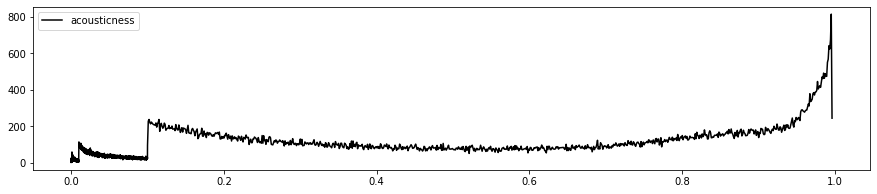

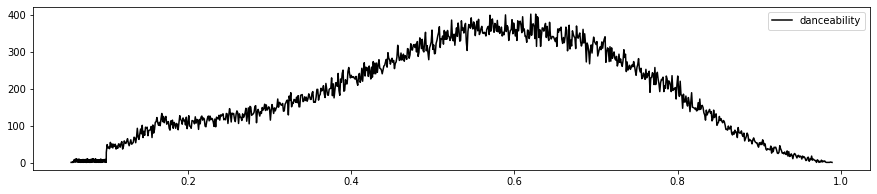

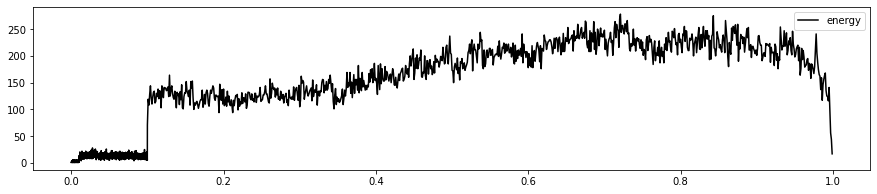

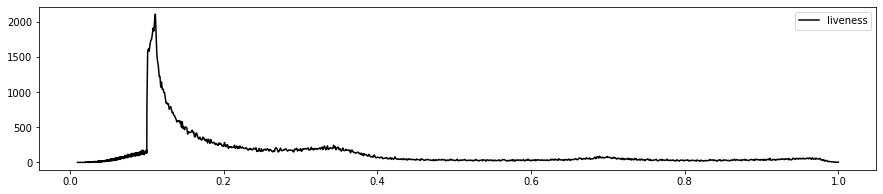

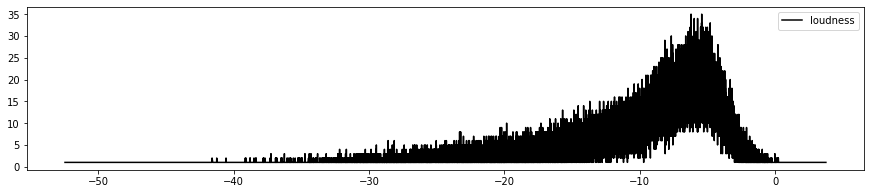

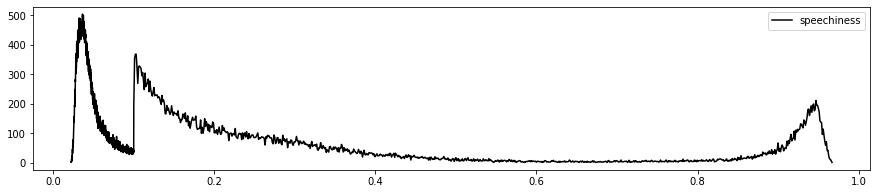

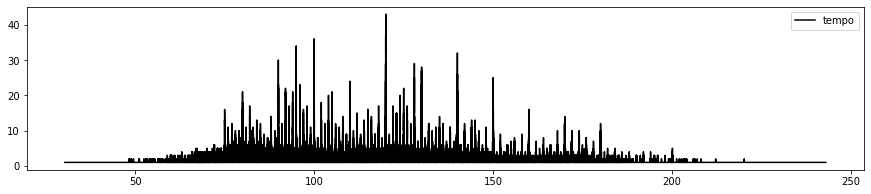

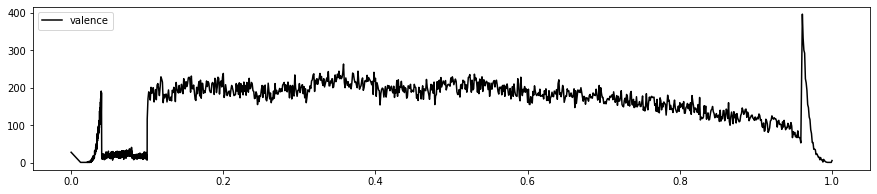

In [ ]:
Acousticness = df['acousticness'].value_counts().sort_index()
Acousticness_df = pd.DataFrame(data=Acousticness)
Acousticness_df.plot(figsize=(15,3), color='k');
# Acousticness
# A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 
# 1.0 represents high confidence the track is acoustic. 

Danceability = df['danceability'].value_counts().sort_index()
Danceability_df = pd.DataFrame(data=Danceability)
Danceability_df.plot(figsize=(15,3), color='k');
# Danceability
# A value of 0.0 is least danceable and 1.0 is most danceable. 
# Danceability describes how suitable a track is for dancing based on a combination of musical elements 
# including tempo, rhythm stability, beat strength, and overall regularity. 

Energy = df['energy'].value_counts().sort_index()
Energy_df = pd.DataFrame(data=Energy)
Energy_df.plot(figsize=(15,3), color='k');
# Energy
# Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. 

# Typically, energetic tracks feel fast, loud, and noisy. 
# For example, death metal has high energy, while a Bach prelude scores low on the scale. 
# Perceptual features contributing to this attribute include dynamic range, perceived loudness,
# timbre, onset rate, and general entropy. 

Liveness = df['liveness'].value_counts().sort_index()
Liveness_df = pd.DataFrame(data=Liveness)
Liveness_df.plot(figsize=(15,3), color='k');
# Liveness
#	Detects the presence of an audience in the recording. 
# Higher liveness values represent an increased probability that the track was performed live. 
# A value above 0.8 provides strong likelihood that the track is live. 

Loudness = df['loudness'].value_counts().sort_index()
Loudness_df = pd.DataFrame(data=Loudness)
Loudness_df.plot(figsize=(15,3), color='k');
# Loudness
# The overall loudness of a track in decibels (dB). 
# Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. 
# Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude).
# Values typical range between -60 and 0 db.

Speechiness = df['speechiness'].value_counts().sort_index()
Speechiness_df = pd.DataFrame(data=Speechiness)
Speechiness_df.plot(figsize=(15,3), color='k');
# Speechiness
#	Speechiness detects the presence of spoken words in a track. 
# The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. 
# Values above 0.66 describe tracks that are probably made entirely of spoken words. 
# Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. 
# Values below 0.33 most likely represent music and other non-speech-like tracks.

Tempo = df['tempo'].value_counts().sort_index()
Tempo_df = pd.DataFrame(data=Tempo)
Tempo_df.plot(figsize=(15,3), color='k');
# Tempo
# The overall estimated tempo of a track in beats per minute (BPM). 
# In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 

Valence = df['valence'].value_counts().sort_index()
Valence_df = pd.DataFrame(data=Valence)
Valence_df.plot(figsize=(15,3), color='k');
# Valence
# A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. 
# Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). 


######### Spotify Feature Attributes Graphed for 3 Million + Songs ###########

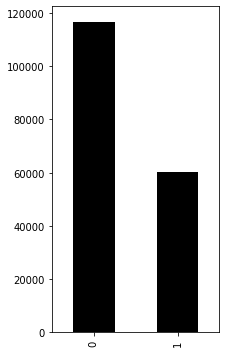

In [ ]:
df['mode'].value_counts().sort_index().plot.bar(figsize=(3,6),color='k');

# Major and Minor may describe an interval, chord, scale, or key in Western music.
#                         Major / Minor Mode need to determine which is which

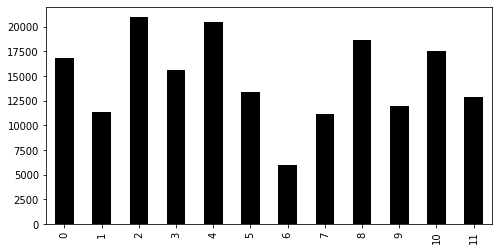

In [ ]:
df['key'].value_counts().sort_index().plot.bar(figsize=(8,4),color='k');

# The estimated overall key of the track. Integers map to pitches using standard Pitch Class Notation.
#                                 Need to determine numbers for keys

###Top Categories

In [ ]:
def top_artists_by_popularity(dataframe, lower_bound, upper_bound):
    

    reindex_order =  dataframe.groupby(['artist_name']).sum()['popularity'].sort_values(ascending = False)[lower_bound:upper_bound].index[::-1]     
    # order of index to make right values in right places
        
    total_value_of_popularity =  dataframe.groupby(['artist_name']).sum()['popularity'].sort_values(ascending = False)[
        lower_bound:upper_bound].reindex(reindex_order)
    
    total_songs = dataframe['artist_name'].value_counts().round(0).reindex(reindex_order)   
    
    df = pd.DataFrame({('Artist ') :total_value_of_popularity.index, 
                        ('Total Artist Popularity '): total_value_of_popularity.values,
                        ('Total Song Count '): total_songs.values}) 
  
    fig = px.bar(df, x = ('Total Artist Popularity ') , y = ('Artist '),
                    
                     hover_data = [('Total Artist Popularity '), ('Total Song Count ')],
                                       
                     color = ('Total Artist Popularity ') , title= f'Artists Popularity Ranked ({lower_bound +1},{upper_bound})',
               
                     height = 700  )

    return fig.show()

top_artists_by_popularity(df, 0, 20)

In [ ]:
#top artist by popularity
df.groupby("artist_name")["popularity"].sum().sort_values(ascending=False).head(20)

artist_name
Hans Zimmer                 19439
Wolfgang Amadeus Mozart     17785
Nobuo Uematsu               17714
Giuseppe Verdi              17495
Johann Sebastian Bach       16508
John Williams               15585
Frédéric Chopin             15193
Giacomo Puccini             14758
Ludwig van Beethoven        14597
Bob Marley & The Wailers    14520
Max Richter                 13353
Drake                       11048
Eminem                      10692
Hillsong Worship             9883
Howard Shore                 9787
Ramin Djawadi                9774
Randy Newman                 9730
Georges Bizet                9701
Richard Wagner               9495
The Beatles                  8965
Name: popularity, dtype: int64

In [ ]:
def top_n_artists_by_song_count(dataframe, lower_bound, upper_bound):
    
    reindex_order = dataframe['artist_name'].value_counts()[lower_bound:upper_bound].index[::-1]     
    # order of index to make right values in right places
        
    total_value_of_songs = dataframe['artist_name'].value_counts()[lower_bound:upper_bound].reindex(reindex_order)
    
    total_value_of_popularity =  dataframe.groupby(['artist_name']).sum()['popularity'].reindex(reindex_order)   # so we can see their popularity too
    
    df = pd.DataFrame({('Artist ') :total_value_of_songs.index, 
                        ('Total Song Count '): total_value_of_songs.values,
                        ('Total Artist Popularity '): total_value_of_popularity.values}) 
  
    fig = px.bar(df, x = ('Total Song Count ') , y = ('Artist '),
                    
                     hover_data = [('Total Song Count '), ('Total Artist Popularity ')],
                                       
                     color = ('Total Song Count ') , title= f'Artists Song Count Ranked ({lower_bound+1},{upper_bound}) ',
               
                     height = 700  )

    return fig.show()

top_n_artists_by_song_count(df,0,20)

In [ ]:
# def rank_artist_similarity(data, artist, genre_parameter):

#     artist_data = data[data.artist_name == artist]
#     artist_genres = artist_data.genre  #set(artist_data.genre)
#     similarity_data = data.drop(artist_data.index)
#     similarity_data.genres = similarity_data.genre.apply(lambda genres: list(set(genres).intersection(artist_genres)))
#     similarity_lengths = similarity_data.genres.str.len()
#     similarity_data = similarity_data.reindex(similarity_lengths[similarity_lengths >= genre_parameter].sort_values(ascending=False).index)
#     similarity_data.rename(columns={'artists': f'Similar Artists to {artist}', 'genres': 'Similar Genres', 'popularity': 'Artist Popularity'}, inplace=True)
    
#     return similarity_data

# rank_artist_similarity(df, 'Eminem', 3)

# I dont think I will use this cell !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

#Encode Categorical Columns (new df)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoded_df = df. copy()

# Export SpotifyFeatures df to .csv file
# SpotifyFeatures.to_csv('SpotifyFeatures_Encoded_df.csv')


genre_encoder = LabelEncoder()
encoded_df['genre'] = genre_encoder.fit_transform(encoded_df['genre'])

artist_encoder = LabelEncoder()
encoded_df['artist_name'] = artist_encoder.fit_transform(encoded_df['artist_name'])

song_encoder = LabelEncoder()
encoded_df['track_name'] = encoded_df['track_name'].astype(str)
encoded_df['track_name'] = song_encoder.fit_transform(encoded_df['track_name'])  #Raised Error: Needs to be str or int
encoded_df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,15,5181,18317,0BRjO6ga9RKCKjfDqeFgWV,0,0.6110,0.389,99373,0.910,0.000000,0,0.3460,-1.828,0,0.0525,166.969,0,0.814
1,15,8254,92822,0BjC1NfoEOOusryehmNudP,1,0.2460,0.590,137373,0.737,0.000000,1,0.1510,-5.559,1,0.0868,174.003,0,0.816
2,15,6451,32139,0CoSDzoNIKCRs124s9uTVy,3,0.9520,0.663,170267,0.131,0.000000,2,0.1030,-13.879,1,0.0362,99.488,1,0.368
3,15,5181,30946,0Gc6TVm52BwZD07Ki6tIvf,0,0.7030,0.240,152427,0.326,0.000000,0,0.0985,-12.178,0,0.0395,171.758,0,0.227
4,15,4074,90654,0IuslXpMROHdEPvSl1fTQK,4,0.9500,0.331,82625,0.225,0.123000,3,0.2020,-21.150,0,0.0456,140.576,0,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232716,24,6276,97939,1U0OMWvR89Cm20vCNar50f,39,0.2310,0.736,222667,0.701,0.000000,9,0.2030,-4.345,1,0.1000,99.991,0,0.770
232717,24,1259,90986,2gGqKJWfWbToha2YmDxnnj,43,0.1040,0.802,201173,0.516,0.000485,8,0.1050,-9.014,0,0.2130,175.666,0,0.482
232719,24,1633,56686,2iZf3EUedz9MPqbAvXdpdA,32,0.5660,0.423,144667,0.337,0.000000,9,0.2760,-13.092,1,0.0436,80.023,0,0.497
232721,24,6508,17928,1qWZdkBl4UVPj9lK6HuuFM,38,0.0329,0.785,282447,0.683,0.000880,5,0.2370,-6.944,1,0.0337,113.830,0,0.969


Ask Yourself: Are all of the columns encoded numerically??? (minus the track ID)

In [ ]:
# encoded_df.info()

In [ ]:
# I think what is going on here is the 'track_id' col is being moved to the beginning of df
# In preparation for the forthcoming knn slicing function...
col_name = "track_id"
first_col = encoded_df.pop(col_name)
encoded_df.insert(0, col_name, first_col)

col_name = "track_name"
first_col = encoded_df.pop(col_name)
encoded_df.insert(1, col_name, first_col)

In [65]:
df.shape

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.9100,0.000000,0,0.3460,-1.828,0,0.0525,166.969,0,0.8140
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.7370,0.000000,1,0.1510,-5.559,1,0.0868,174.003,0,0.8160
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.1310,0.000000,2,0.1030,-13.879,1,0.0362,99.488,1,0.3680
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.3260,0.000000,0,0.0985,-12.178,0,0.0395,171.758,0,0.2270
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.2250,0.123000,3,0.2020,-21.150,0,0.0456,140.576,0,0.3900
5,Movie,Henri Salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0,0.74900,0.578,160627,0.0948,0.000000,0,0.1070,-14.970,0,0.1430,87.479,0,0.3580
6,Movie,Martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",0NUiKYRd6jt1LKMYGkUdnZ,2,0.34400,0.703,212293,0.2700,0.000000,0,0.1050,-12.675,0,0.9530,82.873,0,0.5330
7,Movie,Laura Mayne,Let Me Let Go,0PbIF9YVD505GutwotpB5C,15,0.93900,0.416,240067,0.2690,0.000000,1,0.1130,-8.949,0,0.0286,96.827,0,0.2740
8,Movie,Chorus,Helka,0ST6uPfvaPpJLtQwhE6KfC,0,0.00104,0.734,226200,0.4810,0.000860,2,0.0765,-7.725,0,0.0460,125.080,0,0.7650
9,Movie,Le Club des Juniors,Les bisous des bisounours,0VSqZ3KStsjcfERGdcWpFO,10,0.31900,0.598,152694,0.7050,0.001250,4,0.3490,-7.790,0,0.0281,137.496,0,0.7180


#Train, Test Split w/Target: ID

In [ ]:
traintest_df = encoded_df.copy()  # Make copy just in case

# Export SpotifyFeatures df to .csv file
# SpotifyFeatures.to_csv('SpotifyFeatures_traintest_df.csv')

In [ ]:
traintest_df  # Double-Check everything is up to par

,track_id,track_name,genre,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0BRjO6ga9RKCKjfDqeFgWV,18317,15,5181,0,0.6110,0.389,99373,0.910,0.000000,0,0.3460,-1.828,0,0.0525,166.969,0,0.814
1,0BjC1NfoEOOusryehmNudP,92822,15,8254,1,0.2460,0.590,137373,0.737,0.000000,1,0.1510,-5.559,1,0.0868,174.003,0,0.816
2,0CoSDzoNIKCRs124s9uTVy,32139,15,6451,3,0.9520,0.663,170267,0.131,0.000000,2,0.1030,-13.879,1,0.0362,99.488,1,0.368
3,0Gc6TVm52BwZD07Ki6tIvf,30946,15,5181,0,0.7030,0.240,152427,0.326,0.000000,0,0.0985,-12.178,0,0.0395,171.758,0,0.227
4,0IuslXpMROHdEPvSl1fTQK,90654,15,4074,4,0.9500,0.331,82625,0.225,0.123000,3,0.2020,-21.150,0,0.0456,140.576,0,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232716,1U0OMWvR89Cm20vCNar50f,97939,24,6276,39,0.2310,0.736,222667,0.701,0.000000,9,0.2030,-4.345,1,0.1000,99.991,0,0.770
232717,2gGqKJWfWbToha2YmDxnnj,90986,24,1259,43,0.1040,0.802,201173,0.516,0.000485,8,0.1050,-9.014,0,0.2130,175.666,0,0.482
232719,2iZf3EUedz9MPqbAvXdpdA,56686,24,1633,32,0.5660,0.423,144667,0.337,0.000000,9,0.2760,-13.092,1,0.0436,80.023,0,0.497
232721,1qWZdkBl4UVPj9lK6HuuFM,17928,24,6508,38,0.0329,0.785,282447,0.683,0.000880,5,0.2370,-6.944,1,0.0337,113.830,0,0.969


In [ ]:
from sklearn.model_selection import train_test_split

X = traintest_df[['genre', 'artist_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']]

y = traintest_df['track_name']


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, test_size=0.15)
print(
    f"""
    X Train: {X_train.shape, type(X_train)}, 
    y train: {y_train.shape, type(y_train)},
    X Test: {X_test.shape, type(X_test)},
    y test: {y_test.shape, type(y_test)}
    """
)


    X Train: ((150257, 16), <class 'pandas.core.frame.DataFrame'>), 
    y train: ((150257,), <class 'pandas.core.series.Series'>),
    X Test: ((26517, 16), <class 'pandas.core.frame.DataFrame'>),
    y test: ((26517,), <class 'pandas.core.series.Series'>)
    


In [ ]:
# unique_class_labels =len(np.unique(y))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, NearestNeighbors
from sklearn import metrics
from sklearn.pipeline import Pipeline

# WARNING:  RUNNING THE ENTIRE PIPELINE WILL ALMOST CRASH RAM! - free up ram prior to use!
nca = NeighborhoodComponentsAnalysis(random_state=42)
nn_classifier = NearestNeighbors(n_neighbors=15, n_jobs=-1)
nca_pipe = Pipeline([
                     ('nca', nca), 
                     ('nn', nn_classifier)
          ])
# nca_pipe.fit(X_train, y_train)  # Runtime Crash!??...
# print(f'NCA Pipeline Score: {nca_pipe.score(X_test, y_test)}')

# knn_nca_y_pred = nca_pipe.predict(X_test)
# print(f'{metrics.accuracy_score("Actual:",y_test, "Predicted:", knn_nca_y_pred)}')

In [ ]:
nca_pipe

Pipeline(memory=None,
         steps=[('nca',
                 NeighborhoodComponentsAnalysis(callback=None, init='auto',
                                                max_iter=50, n_components=None,
                                                random_state=42, tol=1e-05,
                                                verbose=0, warm_start=False)),
                ('nn',
                 NearestNeighbors(algorithm='auto', leaf_size=30,
                                  metric='minkowski', metric_params=None,
                                  n_jobs=-1, n_neighbors=15, p=2,
                                  radius=1.0))],
         verbose=False)

In [ ]:
# Nearest Neighbors fit then predict 
from flask import jsonify
nneighbors = NearestNeighbors(n_neighbors=15, n_jobs=-1)
nneighbors.fit(encoded_df[encoded_df.columns[2:]], y)  #fit all columns w/ possible slice that will be used in algorithm. No indeces or track_id


def predict_tracks(data, track_id):
    id_index = encoded_df.index[encoded_df['track_id'] == track_id]
    # print(f"id: {id}")
    series = encoded_df.iloc[id_index, 2:].to_numpy()
    # print(f"series: {series}")
    nneighbors_ = nneighbors.kneighbors(series)
    new_observations = nneighbors_[1][0][6:26]
    encoded_predict = [encoded_df.track_id.iloc[i] for i in new_observations]
    print(f"{len(encoded_predict)} unique json Spotify track ids were returned. The converted song titles are the following:\n")
    json_output = df[df['track_id'].isin(encoded_predict)].track_name.values
 
    # convert dictionary string to dictionary 
    # return print({'track_id': json_output})
    # return  json_output, encoded_predict


    return encoded_predict

In [ ]:
# Choose random track id by .loc[] column
df.iloc[10000]

genre                          Alternative
artist_name                Large Professor
track_name                I Juswanna Chill
track_id            3ipzZgH1766XXRamVwk1Iw
popularity                              54
acousticness                         0.184
danceability                         0.754
duration_ms                         208867
energy                               0.801
instrumentalness                         0
key                                      0
liveness                             0.132
loudness                            -5.992
mode                                     1
speechiness                           0.35
tempo                               90.843
time_signature                           0
valence                              0.391
Name: 10059, dtype: object

In [ ]:
test_song='3ipzZgH1766XXRamVwk1Iw'
# Call Function
predict_tracks(encoded_df, test_song)

9 unique json Spotify track ids were returned. The converted song titles are the following:



['1OFKUn2VLafrHj7ybnap0Q',
 '1rnXgo3fhkivqzp40F3MQG',
 '2b69WEj0c5b6oj8MXcWZJS',
 '2O8AQadTJzQ3wdhSNRHdYg',
 '4bCNuJYfnWglrBsd9s9LDE',
 '1V7sPJKrG9BkVsAoezgQuB',
 '4mQwxVqjcHdUEfwSWEOopx',
 '6qgpBezjMvybos30jStS2Z',
 '0Ov4x4mro5sTaBlzlDuXYg']

In [ ]:
result = predict_tracks(encoded_df, test_song)
json_output_df =  df[df['track_id'].isin(result)]
json_output_df

9 unique json Spotify track ids were returned. The converted song titles are the following:



,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
4303,Country,Hunter Hayes,Young And In Love,1rnXgo3fhkivqzp40F3MQG,40,0.090500,0.404,229758,0.805,0.000000,8,0.2920,-5.212,0,0.0614,114.741,0,0.2940
5663,Alternative,Inspector,Amargo Adiós,4mQwxVqjcHdUEfwSWEOopx,65,0.176000,0.597,229800,0.533,0.000000,8,0.1090,-7.663,1,0.0450,139.511,0,0.8340
6020,Alternative,In Flames,I Am Above,6qgpBezjMvybos30jStS2Z,52,0.000031,0.545,229816,0.977,0.000004,9,0.0704,-5.033,1,0.1060,120.018,0,0.1720
11583,Alternative,Incubus,Oil and Water,4bCNuJYfnWglrBsd9s9LDE,45,0.145000,0.594,229800,0.785,0.000096,2,0.1650,-5.364,0,0.0329,130.217,0,0.2780
23015,Electronic,JOYRYDE,SPEED TRAP,1V7sPJKrG9BkVsAoezgQuB,49,0.017900,0.645,229511,0.839,0.000020,0,0.6070,-3.877,1,0.2950,128.132,0,0.1040
97221,Children’s Music,In Flames,I Am Above,0Ov4x4mro5sTaBlzlDuXYg,58,0.000034,0.545,229816,0.979,0.000008,9,0.0689,-4.495,1,0.1090,120.026,0,0.1920
110723,Pop,Hootie & The Blowfish,Only Wanna Be with You,1OFKUn2VLafrHj7ybnap0Q,70,0.107000,0.490,229587,0.873,0.000005,1,0.1180,-5.861,0,0.0355,103.272,0,0.5130
123982,Classical,Howard Shore,The King of the Golden Hall,2O8AQadTJzQ3wdhSNRHdYg,48,0.794000,0.144,229440,0.074,0.722000,5,0.1050,-21.754,1,0.0363,139.327,0,0.0346
158500,Reggaeton,J Alvarez,Envidia,2b69WEj0c5b6oj8MXcWZJS,44,0.120000,0.773,229493,0.660,0.000004,0,0.2150,-8.458,0,0.2520,90.062,0,0.5170


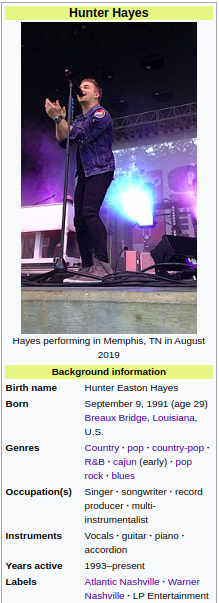

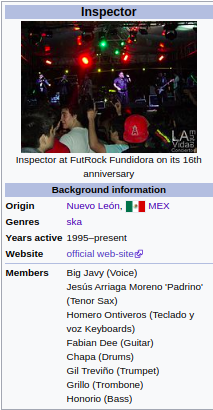

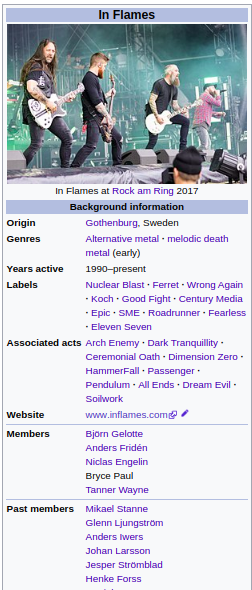

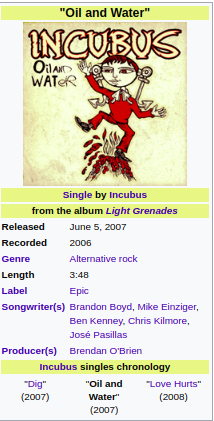

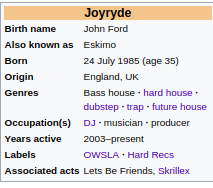
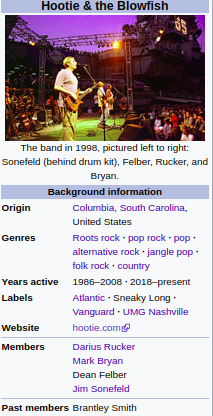

In [ ]:
# rows = range(len(df[df['track_id'].isin(result)].track_name.values))
# for track in  rows:
#     next_song = json_output_df[json_output_df['track_id'].isin(result)].track_name.values

In [ ]:
# nextsong_df = pd.DataFrame(next_song, columns=['next_song_prediction'])
# nextsong_df

In [ ]:
json_output_df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
4303,Country,Hunter Hayes,Young And In Love,1rnXgo3fhkivqzp40F3MQG,40,0.090500,0.404,229758,0.805,0.000000,8,0.2920,-5.212,0,0.0614,114.741,0,0.2940
5663,Alternative,Inspector,Amargo Adiós,4mQwxVqjcHdUEfwSWEOopx,65,0.176000,0.597,229800,0.533,0.000000,8,0.1090,-7.663,1,0.0450,139.511,0,0.8340
6020,Alternative,In Flames,I Am Above,6qgpBezjMvybos30jStS2Z,52,0.000031,0.545,229816,0.977,0.000004,9,0.0704,-5.033,1,0.1060,120.018,0,0.1720
11583,Alternative,Incubus,Oil and Water,4bCNuJYfnWglrBsd9s9LDE,45,0.145000,0.594,229800,0.785,0.000096,2,0.1650,-5.364,0,0.0329,130.217,0,0.2780
23015,Electronic,JOYRYDE,SPEED TRAP,1V7sPJKrG9BkVsAoezgQuB,49,0.017900,0.645,229511,0.839,0.000020,0,0.6070,-3.877,1,0.2950,128.132,0,0.1040
97221,Children’s Music,In Flames,I Am Above,0Ov4x4mro5sTaBlzlDuXYg,58,0.000034,0.545,229816,0.979,0.000008,9,0.0689,-4.495,1,0.1090,120.026,0,0.1920
110723,Pop,Hootie & The Blowfish,Only Wanna Be with You,1OFKUn2VLafrHj7ybnap0Q,70,0.107000,0.490,229587,0.873,0.000005,1,0.1180,-5.861,0,0.0355,103.272,0,0.5130
123982,Classical,Howard Shore,The King of the Golden Hall,2O8AQadTJzQ3wdhSNRHdYg,48,0.794000,0.144,229440,0.074,0.722000,5,0.1050,-21.754,1,0.0363,139.327,0,0.0346
158500,Reggaeton,J Alvarez,Envidia,2b69WEj0c5b6oj8MXcWZJS,44,0.120000,0.773,229493,0.660,0.000004,0,0.2150,-8.458,0,0.2520,90.062,0,0.5170


#Webscraping

In [ ]:
# # Scrape lyrics from a Genius.com if given a col

# def scrape_song_lyrics(artist_col, track_column, json_output_df):
#     # 1. Get a list of Genius.com URL’s for a specified number of songs for an artist
#     # Get artist object from Genius API

#     artist = artist_col.replace(" ", "-")
#     artist_name = artist_col
#     song = artist_col.replace(" ", "-")
#     # print(scrape_song_lyrics('https://genius.com/Lana-del-rey-young-and-beautiful-lyrics'))  # Example genius url
#     page = (f'https://genius.com/{artist}-{song}')
#     song_cap = 2

#     def request_artist_info(artist_name, page):
#         base_url = 'https://api.genius.com'
#         headers = {'Authorization': 'Bearer ' + GENIUS_API_TOKEN}
#         search_url = base_url + '/search?per_page=10&page=' + str(page)
#         data = {'q': artist_name}
#         response = requests.get(search_url, data=data, headers=headers)
#         return response
#         response = response

#     # Get Genius.com song url's from artist object
#     def request_song_url(artist_name, song_cap):
#         page = 1
#         songs = []
        
#         while True:
#             response = request_artist_info(artist_name, page)
#             json = response.json()
#             # Collect up to song_cap song objects from artist
#             song_info = []
#             for hit in json['response']['hits']:
#                 if artist_name.lower() in hit['result']['primary_artist']['name'].lower():
#                     song_info.append(hit)
        
#             # Collect song URL's from song objects
#             for song in song_info:
#                 if (len(songs) < song_cap):
#                     url = song['result']['url']
#                     songs.append(url)
                
#             if (len(songs) == song_cap):
#                 break
#             else:
#                 page += 1
            
#         print('Found {} songs by {}'.format(len(songs), artist_name))
#         return url, print("Songs:", songs)
#         url = url
#     # DEMO
#     # request_song_url('Lana Del Rey', 2)
#     def scrape_song_lyrics(url):
#         page = requests.get(url)
#         html = BeautifulSoup(page.text, 'html.parser')
#         lyrics = html.find('div', class_='lyrics').get_text()
#         #remove identifiers like chorus, verse, etc
#         lyrics = re.sub(r'[\(\[].*?[\)\]]', '', lyrics)
#         #remove empty lines
#         lyrics = os.linesep.join([s for s in lyrics.splitlines() if s])         
#         return lyrics

#     def scrape_all_lyrics(artist_name):

#         rows = json_output_df['track_name']
#         for i in range(len(json_output_df['artist_name'])):

#             artist = json_output_df['artist_name'].replace(" ", "-")
#             song = json_output_df['track_name'].replace(" ", "-")
#             print(scrape_song_lyrics(f'https://genius.com/{artist}-{song}'))

In [ ]:
# type(scrape_song_lyrics(artist_col, track_col, dataframe))

In [ ]:
# artist_col = json_output_df['artist_name']
# track_column = json_output_df['track_name']
# json_output_df = json_output_df
# scrape_song_lyrics(artist_col, track_column, json_output_df)

In [ ]:
# dataframe.reset_index(drop=True, inplace=True)
# dataframe.head()

In [ ]:
!pip install beautifulsoup4

In [ ]:
# Lets try to scrape lyrics from each song in the output and join to the encoded_df
GENIUS_API_TOKEN='kOeNN72z-58MMwYta-EODaJCY7ewIw6S2eSx-TfY5WdtBzBf-lRQwFSC1toKlzNqL8kSo_oC8D4nTDyy6674cQ'

!pip install beautifulsoup4
!pip install unidecode

# Make HTTP requests
import requests
# Scrape data from an HTML document
from bs4 import BeautifulSoup
# I/O
import os
# Search and manipulate strings
import re
import unidecode
print("Packages Installed")

Packages Installed


In [ ]:
# predictions = predict_tracks(encoded_df, test_song)
# lyrics = []
# for i in predictions:
#   lyrics.append(get_lyrics())
# dataframe['lyrics'] = pd.Series(lyrics)

In [ ]:
# base_url = "https://genius.com/" # this i followed by - seperated artist, song, lyrics
# page = requests.get()

In [ ]:
# TOKEN = "kOeNN72z-58MMwYta-EODaJCY7ewIw6S2eSx-TfY5WdtBzBf-lRQwFSC1toKlzNqL8kSo_oC8D4nTDyy6674cQ"
# headers = {'Authorization': f'Bearer {TOKEN}'}

In [ ]:
dataframe = json_output_df
song = json_output_df['track_name'].iloc[0]
artist = json_output_df['artist_name'].iloc[0]

In [ ]:
# Create a sperate function that does the same thing and 
# returns the dirty lyrics
def scrape(artist, song):
  url = f"https://genius.com/{'-'.join(artist.capitalize().split() + song.lower().split())}-lyrics"
  response = requests.get(url)
  soup = BeautifulSoup(response.text, "html.parser")
  lyrics = soup.find('p').text
  return lyrics
dirty_lyrics = scrape(artist, song)
dirty_lyrics

'[Verse 1]\nI\'m coming to see you with skylines and rearview\nFor streets that I used to know\nI\'m finding my way back home\n\n[Verse 2]\nI remember the last night your eyes and that goodbye\nYou whispering, "Please don\'t go," oh\nI\'m finding my way back home\n\n[Pre-Chorus]\nWe burn strong and bright\nSome fires never die\nAnd I learned my lesson one heartbreak too late this time\n\n[Chorus]\nAnd we were living, learning, laying in a bed that was burning\nIt\'s so hard when you\'re young and in love\nWe were trying and fighting, holding on, laughing and crying\n\'Cause that\'s what you do when you\'re young and in love\n\n[Verse 3]\nThe miles make me miss you\nBut it\'s worth what I\'ve been through\nTo learn what I need to know, and oh\nMy heart knows the way back home\n\n[Pre-Chorus]\nWell, I miss you far and wide\nLove ain\'t black and white\nI\'m learning from hurting that you\'re what I\'ve searched to find\n\n[Chorus]\nOh, and we were just living and learning, laying in a be

In [ ]:
# dirty_lyrics  #

In [ ]:
part_clean = unidecode.unidecode(dirty_lyrics)
part_clean = part_clean.replace("\n", " ")
part_clean

'[Verse 1] I\'m coming to see you with skylines and rearview For streets that I used to know I\'m finding my way back home  [Verse 2] I remember the last night your eyes and that goodbye You whispering, "Please don\'t go," oh I\'m finding my way back home  [Pre-Chorus] We burn strong and bright Some fires never die And I learned my lesson one heartbreak too late this time  [Chorus] And we were living, learning, laying in a bed that was burning It\'s so hard when you\'re young and in love We were trying and fighting, holding on, laughing and crying \'Cause that\'s what you do when you\'re young and in love  [Verse 3] The miles make me miss you But it\'s worth what I\'ve been through To learn what I need to know, and oh My heart knows the way back home  [Pre-Chorus] Well, I miss you far and wide Love ain\'t black and white I\'m learning from hurting that you\'re what I\'ve searched to find  [Chorus] Oh, and we were just living and learning, laying in a bed that was burning It\'s so hard 

In [ ]:
more_clean = re.sub("\[[^[\]]*\]", "",part_clean)
more_clean

' I\'m coming to see you with skylines and rearview For streets that I used to know I\'m finding my way back home   I remember the last night your eyes and that goodbye You whispering, "Please don\'t go," oh I\'m finding my way back home   We burn strong and bright Some fires never die And I learned my lesson one heartbreak too late this time   And we were living, learning, laying in a bed that was burning It\'s so hard when you\'re young and in love We were trying and fighting, holding on, laughing and crying \'Cause that\'s what you do when you\'re young and in love   The miles make me miss you But it\'s worth what I\'ve been through To learn what I need to know, and oh My heart knows the way back home   Well, I miss you far and wide Love ain\'t black and white I\'m learning from hurting that you\'re what I\'ve searched to find   Oh, and we were just living and learning, laying in a bed that was burning It\'s so hard when you\'re young and in love We were trying and fighting, holding

In [ ]:
cleanest = re.sub("\s+", " ", more_clean)
cleanest

' I\'m coming to see you with skylines and rearview For streets that I used to know I\'m finding my way back home I remember the last night your eyes and that goodbye You whispering, "Please don\'t go," oh I\'m finding my way back home We burn strong and bright Some fires never die And I learned my lesson one heartbreak too late this time And we were living, learning, laying in a bed that was burning It\'s so hard when you\'re young and in love We were trying and fighting, holding on, laughing and crying \'Cause that\'s what you do when you\'re young and in love The miles make me miss you But it\'s worth what I\'ve been through To learn what I need to know, and oh My heart knows the way back home Well, I miss you far and wide Love ain\'t black and white I\'m learning from hurting that you\'re what I\'ve searched to find Oh, and we were just living and learning, laying in a bed that was burning It\'s so hard when you\'re young and in love We were trying and fighting, holding on, laughin

In [ ]:
clean = re.sub("\([^()]*\)", "", cleanest)
clean

' I\'m coming to see you with skylines and rearview For streets that I used to know I\'m finding my way back home I remember the last night your eyes and that goodbye You whispering, "Please don\'t go," oh I\'m finding my way back home We burn strong and bright Some fires never die And I learned my lesson one heartbreak too late this time And we were living, learning, laying in a bed that was burning It\'s so hard when you\'re young and in love We were trying and fighting, holding on, laughing and crying \'Cause that\'s what you do when you\'re young and in love The miles make me miss you But it\'s worth what I\'ve been through To learn what I need to know, and oh My heart knows the way back home Well, I miss you far and wide Love ain\'t black and white I\'m learning from hurting that you\'re what I\'ve searched to find Oh, and we were just living and learning, laying in a bed that was burning It\'s so hard when you\'re young and in love We were trying and fighting, holding on, laughin

In [ ]:
# #Trying to define a function that when called will return lyrics for a given column of track names/ids
# def scrape_song(artist, song):
#     url = f"https://genius.com/{'-'.join(artist.capitalize().split() + song.lower().split())}-lyrics"
#     response = requests.get(url)
#     soup = BeautifulSoup(response.text, "html.parser")
#     lyrics = soup.find('div', {'class': "song_body column_layout"})
    
#     # lyrics_unicode = unidecode.unidecode(lyrics)
#     # lyrics_uncleaned = lyrics_unicode.loc[-1].p.text
#     # #remove \n line breaks
#     # lyrics_uncleaned = lyrics_uncleaned.replace("\n", " ")
#     # #remove identifiers like chorus, verse, etc
#     # lyrics_lessuncleaned = re.sub(r'[\(\[].*?[\)\]]', '', lyrics_uncleaned)
#     # #Remove content in brackets
#     # lyrics_lessuncleaned = re.sub("\[[^[\]]*\]", "",lyrics)
#     # # Treats content in parathesis like stop words (e.g., (Hey), (Woo-hoo)) 
#     # lyrics_lessuncleaned = re.sub("\([^()]*\)", "", lyrics)
#     # #remove empty lines
#     # lyrics_cleaned = os.linesep.join([s for s in lyrics_lessuncleaned.splitlines() if s])


#     # return lyrics_cleaned
#     # # lyrics_dirty = lyrics.p.text

#     return lyrics

#     # # return lyrics[-].p.text


# def get_scrapedlyrics(data):  # place the json_outputs_df here

#     for index in range(len(data['artist_name'])):

#             artist = data['artist_name'].iloc[index]
#             # artist = data.at[index, data['artist_name']]  # experimental row with .loc & .at
#             song = data['track_name'].iloc[index]
#             # song = data.at[index, data['track_name']]  # experimental row with .loc & .at
#             print(artist, song)

#             data['lyrics_dirty'] = scrape_song(artist, song)  # Creates a new column
#             # print(data['lyrics_dirty'])
#             append_col = data['lyrics_dirty']
#             new_df = data.merge(append_col, how='inner')


#             return new_df  # Dataframe with appended column of song lyrics

In [62]:
# Practice Cell
#Trying to define a function that when called will return lyrics for a given column of track names/ids
from bs4 import BeautifulSoup
import requests
import unidecode
import re
ARTIST = "Bts"
SONG = "Dynamite"
def scrape_lyrics(artist, song):
    url = f"https://genius.com/{'-'.join(ARTIST.capitalize().split() + SONG.lower().split())}-lyrics"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    dirty = soup.find('p')
    # remove unicode characters
    non_unicode = unidecode.unidecode(dirty.text)
    # remove the bracket stuff []
    more_clean = re.sub("\[[^[\]]*\]", "", non_unicode)
    # remove (...)
    cleaner = re.sub("\([^()]*\)", "", more_clean)
    # Make all whitespace 1
    clean = re.sub("\s+", " ", cleaner)
    return clean
# lyrics = []
# for i in df.shape[0]:
#     artist = df.iloc[i]['artist_name']
#     song = df.iloc[i]['track_name']
#     lyrics.append(scrape_lyrics(artist, song))
# df['lyrics'] = pd.Series(lyrics)

In [63]:
scrape_lyrics(ARTIST, SONG)

'Produced by'

In [ ]:
scraped_df.iloc[0]["lyrics_dirty"]

'Produced by'

In [ ]:
#Same Code used without the function

# url = f"https://genius.com/{'-'.join(artist.capitalize().split() + song.lower().split())}-lyrics"
# response = requests.get(url)
# soup = BeautifulSoup(response.text, "html.parser")
# lyrics = soup.findAll('div', {'class': "song_body column_layout"})
# #remove identifiers like chorus, verse, etc
# lyrics = re.sub(r'[\(\[].*?[\)\]]', '', lyrics)
# #remove \n line breaks
# lyrics = lyrics.replace("\n", " ")
# #Remove content in brackets
# lyrics = re.sub("\[[^[\]]*\]", "",lyrics)
# # Treats content in parathesis like stop words (e.g., (Hey), (Woo-hoo)) 
# lyrics = re.sub("\([^()]*\)", "", lyrics)
# #remove empty lines
# lyrics = os.linesep.join([s for s in lyrics.splitlines() if s]) 

In [ ]:
lyrics

In [ ]:
# Test the Function Above
# json_output_df.track_name
# json_output_df.artist_name

In [ ]:
scraped_df = get_scrapedlyrics(json_output_df)  # place the json_output_df here
# scraped_df = get_scrapedlyrics(json_output_df).drop_duplicates('track_name')
# lyrics_appended = json_output_df.join(dirty_col, how='right')
# la_df = lyrics_appended.copy()

scraped_df

# Export the scraped dataframe to .csv file
# scraped_df.to_csv('Scraped_Data.csv')

Hunter Hayes Young And In Love


ValueError: ignored

#Prepare for Natural Language Processing

In [ ]:
scraped_df_nofeat = scraped_df.drop(columns=['popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'], axis=1)
scraped_df_nofeat = scraped_df_nofeat[['genre', 'track_id', 'track_name','artist_name', 'lyrics_dirty']]

In [ ]:
scraped_df_nofeat

In [ ]:
nlp_df = scraped_df_nofeat.copy()

# Export the scraped dataframe to .csv file
# nlp_df.to_csv('nlp_Scraped_Data_WO_Features.csv')

In [ ]:
#######################################
song_predictions = nlp_df
text = song_predictions['lyrics_dirty']

In [ ]:
song_predictions.drop(['track_id', 'genre'], axis=1)  # take away genre for now
# Should be able to see the entire dataframe

In [ ]:
song_predictions.info()  #Need to fill lyrics_dirty with some lyrics lol

In [ ]:
nlp = spacy.load("en_core_web_sm")

stop_word = [
            'spotify', 
             'track', 'tracks'
             'song', 'songs'
             'playlist', 'playlists'
             'stream', 'streaming', 'streams',
             'music', 'service',
             'feat', 'feat.', 'featuring',
             'like', 'x', "'",
             '5', '21', 'g', 
             'la', 'que', ',',
             ' '
]


STOP_WORDS = nlp.Defaults.stop_words.union(stop_word)

token = []
for doc in song_predictions['lyrics_dirty']:
    text = [token.lemma_ for token in nlp(doc) if
            (token.is_punct == False) and
            (token.text.lower() not in STOP_WORDS)]
    token.append(text)
song_predictions['token'] = token
song_predictions

In [ ]:
# TypeError: object of type 'NoneType' has no len()
# Error is populating becuause of the lyrics not being there. Nonetype is present.
# Fix bug and then is should be smoother saililng. 

# Use link: https://github.com/John-G-Thomas/DS-Unit-4-Sprint-1-NLP/blob/main/module2-vector-representations/LS_DS_412_Vector_Representations_Assignment.ipynb
# To continue

In [ ]:
# Visualize the most common word counts

import seaborn as sns
sns.set()
num_words = [len(s.split()) for s in song_predictions['lyrics_dirty']]
plt.figure(figsize=(12, 6))
sns.distplot(num_words)
plt.title('Words per Document')
plt.xlabel('Number of Words')
plt.ylabel('Proportion of Documents')
plt.show()

In [ ]:
# Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix
# Use Scikit-Learn's tfidfVectorizer

tfidf = TfidfVectorizer(stop_words = 'english',
                        ngram_range = (1, 2),
                        min_df = 3,
                        max_df = 0.01)
#The following should create the vocab and tf-idf score per document.
dtm = tfidf.fit_transform(song_predictions['lyrics_dirty'])
#The following will get feature names to use as a df column headers.
dtm = pd.DataFrame(dtm.todense(), columns = tfidf.get_feature_names())
print(dtm.shape)
dtm.head()

### Create a NearestNeighbor Model. Call the Genius API to get lyrics for the song the user originally input. Use lyrics from the inout song to and query the (prior) dataframe containing the prediction of songs. Return your winner for the next song to be played. 

In [ ]:
#Goal: To take the list of recommendations returned and find the best next song choice. 
# Create in a dataframe

In [ ]:
# Use a model of your choice to determine the next single song to play

#Neural Network

In [ ]:
# Create a basic neural network from the encoded df. 

In [ ]:
nn_df = encoded_df.copy()
nn_df.head()
# Export SpotifyFeatures df to .csv file
# SpotifyFeatures.to_csv('SpotifyFeatures_nn_df.csv')

In [ ]:
nn_df = df.drop(columns=['track_id', 'genre', 'track_name', 'artist_name', ], axis=1)

In [ ]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
nn_df_s = scaler.fit_transform(nn_df)

In [ ]:
nn_df.shape

In [ ]:
# X_train, X_test split
from sklearn.model_selection import train_test_split

X_train, X_test= train_test_split(nn_df, test_size=0.33)
X_train.shape, X_test.shape

In [ ]:
# neural networks
import os
import datetime
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

from tensorflow.keras.callbacks import TensorBoard
# this is the size of our encoded representations
encoding_dim = 1000

# this is our input placeholder
input_shape = Input(shape=(16,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation="relu")(input_shape)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(16, activation="softmax")(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_shape, decoded)

In [ ]:
autoencoder.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['mae'])

In [ ]:
stop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=2)

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard = TensorBoard(log_dir=logdir)

autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=32,
                shuffle=True,
                validation_data=(X_test, X_test),
                verbose = 1,
                callbacks=[stop, tensorboard])

In [ ]:
predict = autoencoder.predict(X_train)
predict_df = pd.DataFrame(data=predict, columns=X_test.columns)

In [ ]:
# Pickle Final Model
import joblib
filename = "NN_Model_Final.joblib"
item_to_save = nneighbors
joblib.dump(item_to_save, filename, compress=2, protocol=None, cache_size=None)

In [ ]:
# Pickle Final Model
import joblib
filename = "Next_Single_to_Play_Model.joblib"
item_to_save = rndm_cv
joblib.dump(item_to_save, filename, compress=2, protocol=None, cache_size=None)

In [ ]:
# Pickle Final Model
import joblib
filename = "Next_Single_to_Play_Model.joblib"
item_to_save = rndm_cv
joblib.dump(item_to_save, filename, compress=2, protocol=None, cache_size=None)

In [ ]:
# Pickle Final Model
import joblib
filename = "Lyric_Scraper.joblib"
item_to_save = scrape
joblib.dump(item_to_save, filename, compress=2, protocol=None, cache_size=None)

# Load Pickle Model

In [ ]:
filename = 'NN_Model_Final.joblib'
NNeighbors_Model = joblib.load(filename)
# filename = "NN_Model_Final.joblib"
# with open(filename, 'rb') as fo:  # doctest: +ELLIPSIS
#       NNeighbors_Model = joblib.load(fo)

In [ ]:
# # Call Function
# test_song='2iZf3EUedz9MPqbAvXdpdA'
# predict_tracks(encoded_df, test_song)

#Unload Pickle Model

#Test Model

# Testing the function to grab and clean lyrics

In [ ]:
from bs4 import BeautifulSoup
import requests

ARTIST = "Bts"
SONG = "Dynamite"

In [ ]:
def scrape(artist, song):
  url = f"https://genius.com/{'-'.join(artist.capitalize().split() + song.lower().split())}-lyrics"
  response = requests.get(url)
  soup = BeautifulSoup(response.text, "html.parser")
  lyrics = soup.findAll('div')[:20]
  print(lyrics[-2])
  # return lyrics

In [ ]:
scrape(ARTIST, SONG)

<div class="song_body column_layout" initial-content-for="song_body">
<div class="column_layout-column_span column_layout-column_span--primary">
<div class="song_body-lyrics">
<h2 class="text_label text_label--gray text_label--x_small_text_size u-top_margin">Dynamite Lyrics</h2>
<div initial-content-for="lyrics">
<div class="lyrics">
<!--sse-->
<p>[Intro: Jungkook]<br/>
'Cause I, I, I'm in the stars tonight<br/>
So watch me bring the fire and set the night alight<br/>
<br/>
[Verse 1: Jungkook]<br/>
Shoes on, get up in the morn'<br/>
Cup of milk, let's rock and roll<br/>
<a annotation-fragment="20634639" class="referent" classification="accepted" data-id="20634639" href="/Bts-dynamite-lyrics#note-20634639" image="false" ng-class="{
          'referent--linked_to_preview': song_ctrl.referent_has_preview(fragment_id),
          'referent--linked_to_preview_active': song_ctrl.highlight_preview_referent(fragment_element_id),
          'referent--purple_indicator': song_ctrl.show_preview_ref